In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [15]:
df = pd.read_csv('stud.csv')

In [16]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [18]:
# Data checks to perform EDA
# 1. Check for missing values
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [19]:
# check for duplicates
df.duplicated().sum()

np.int64(0)

In [20]:
#check for data types
df.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

In [21]:
# check the number of unique values in each column
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [23]:
# check statistical summary of the data
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
# check for categorical  present in the data    
#categorical_cols = df.select_dtypes(include=['object']).columns

<Axes: >

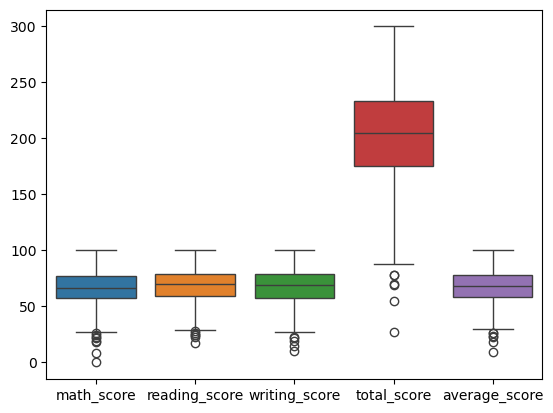

In [40]:
# check for outliers in the data
sns.boxplot(data=df)


In [28]:
# define numerical and categorical columns
numerical_features = [features for features in df.columns if df[features].dtype != 'object']
categorical_features = [features for features in df.columns if df[features].dtype == 'object']
# print columns
print('numerical features:', numerical_features)
print('categorical features:', categorical_features)

numerical features: ['math_score', 'reading_score', 'writing_score']
categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [34]:
# Adding columns for Total score and average score
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average_score'] = df['total_score'] / 3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [36]:
reading_full =df[df['reading_score'] == 100]['average_score'].count()
writing_full =df[df['writing_score'] == 100]['average_score'].count()
math_full =df[df['math_score'] == 100]['average_score'].count()
print('number of students with full reading score:', reading_full)
print('number of students with full writing score:', writing_full)
print('number of students with full math score:', math_full)    

number of students with full reading score: 17
number of students with full writing score: 14
number of students with full math score: 7


In [37]:
reading_less_50 = df[df['reading_score'] < 50]['average_score'].count()
writing_less_50 = df[df['writing_score'] < 50]['average_score'].count()
math_less_50 = df[df['math_score'] < 50]['average_score'].count()
print('number of students with reading score less than 50:', reading_less_50)
print('number of students with writing score less than 50:', writing_less_50)
print('number of students with math score less than 50:', math_less_50)

number of students with reading score less than 50: 90
number of students with writing score less than 50: 114
number of students with math score less than 50: 135
